In [227]:
## Demonstrate applying and correcting drift 

using Pkg
Pkg.activate(".")
using Revise
#Pkg.develop("SMLMDriftCorrection")
using SMLMDriftCorrection
DC = SMLMDriftCorrection
using SMLMSim
using CairoMakie

  Activating project at `c:\Users\wester\.julia\dev\SMLMDriftCorrection\dev`


"""make an Nmer dataset"""

In [228]:
# make an Nmer dataset

γ = 1e5          # Fluorophore emission rate
q = [0 50
     1e-2 0]     # Fluorophore blinking rates
n = 6            # Nmer rank
d = .1           # Nmer diameter
ρ = 0.1          # density of Nmers 
xsize = 25.6     # image size
ysize = 25.6
nframes = 2000   # number of frames
framerate = 50.0 # framerate
σ_psf = 1.3      # psf sigma used for uncertainty calcs 
minphotons = 500 # minimum number of photons per frame accepted

500

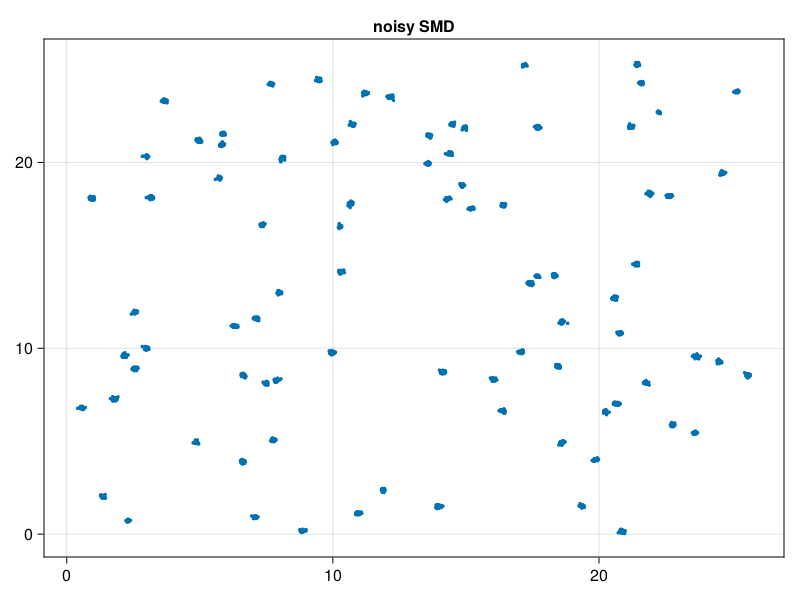

In [229]:
# Simulation sequence
f = SMLMSim.GenericFluor(γ, q)
pattern = SMLMSim.Nmer2D(; n, d)
smd_true = SMLMSim.uniform2D(ρ, pattern, xsize, ysize)
smd_model = SMLMSim.kineticmodel(smd_true, f, nframes, framerate; ndatasets=10, minphotons=minphotons)
smd_noisy = SMLMSim.noise(smd_model, σ_psf)

# Plot the noisy simulation coordinates
#plt_noisy = CairoMakie.scatter(smd_noisy.x, smd_noisy.y)
plt_noisy = Figure()
ax = Axis(plt_noisy[1,1], title="noisy SMD")
scatter!(smd_noisy.x, smd_noisy.y; markersize=5)
plt_noisy

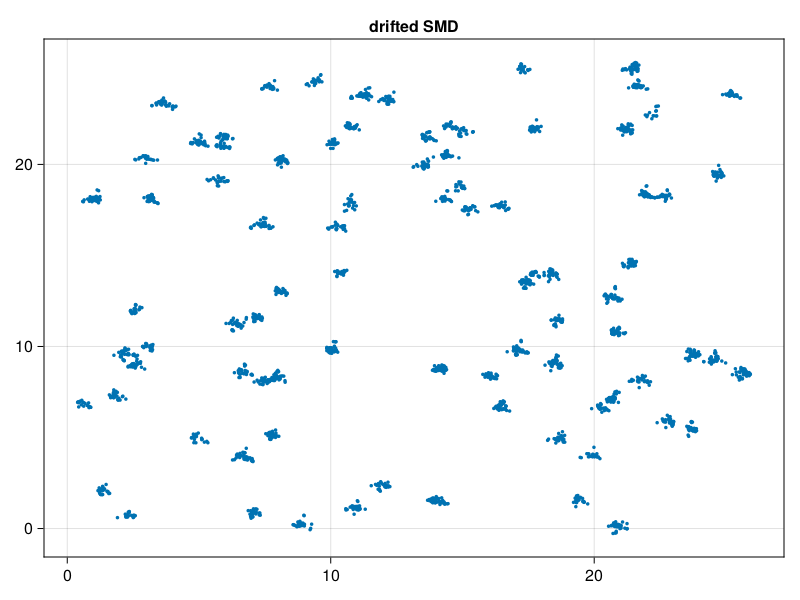

In [230]:
## Set up drift model 
driftmodel = DC.Polynomial(smd_noisy; degree=2, initialize="random")
smd_drift = DC.applydrift(smd_noisy,driftmodel)

# Plot the drifted localizations
plt_model = Figure()
ax = Axis(plt_model[1,1], title="drifted SMD")
scatter!(smd_drift.x, smd_drift.y; markersize=5)
plt_model


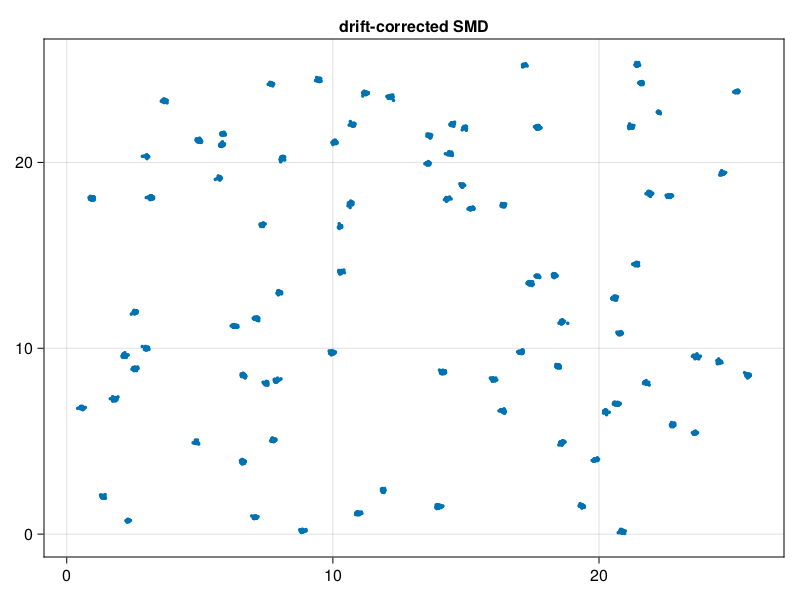

In [231]:

# Perform drift correction
smd_DC = DC.correctdrift(smd_drift,driftmodel)

# Plot the drift corrected localizations
plt_DC = Figure()
ax = Axis(plt_DC[1,1], title="drift-corrected SMD")
scatter!(smd_DC.x, smd_DC.y; markersize=5)
plt_DC

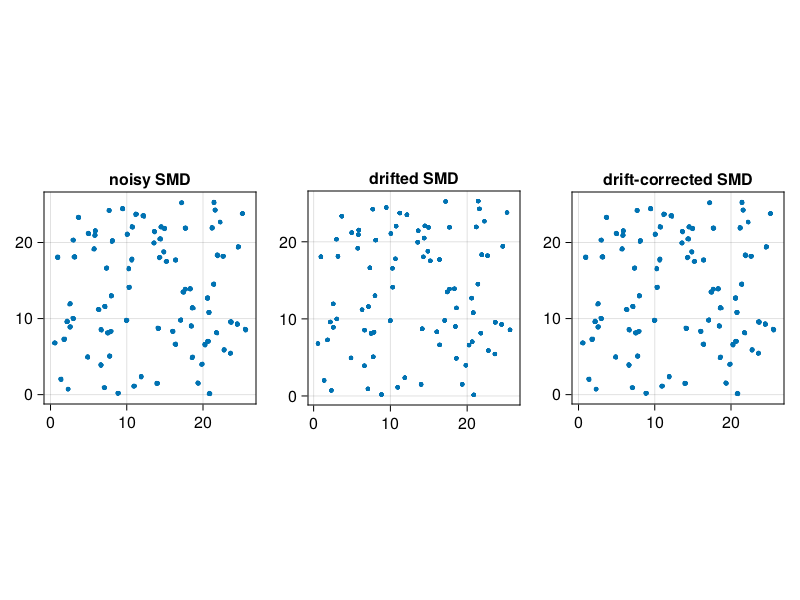

In [241]:
f = Figure()
Axis(f[1, 1], aspect=DataAspect(), title="noisy SMD")
scatter!(smd_noisy.x, smd_noisy.y; markersize=5)
Axis(f[1, 2], aspect=DataAspect(), title="drifted SMD")
scatter!(smd_model.x, smd_model.y; markersize=5)
Axis(f[1, 3], aspect=DataAspect(), title="drift-corrected SMD")
scatter!(smd_DC.x, smd_DC.y; markersize=5)
f